In [1]:
import warnings
warnings.filterwarnings('ignore')
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
path = os.getcwd()
files = []
for file in os.listdir():
    if file.endswith(".csv"):
        files.append(open(file))
df = pd.read_csv(files[0])  

In [4]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
df.shape

(1030, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [6]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

<AxesSubplot:>

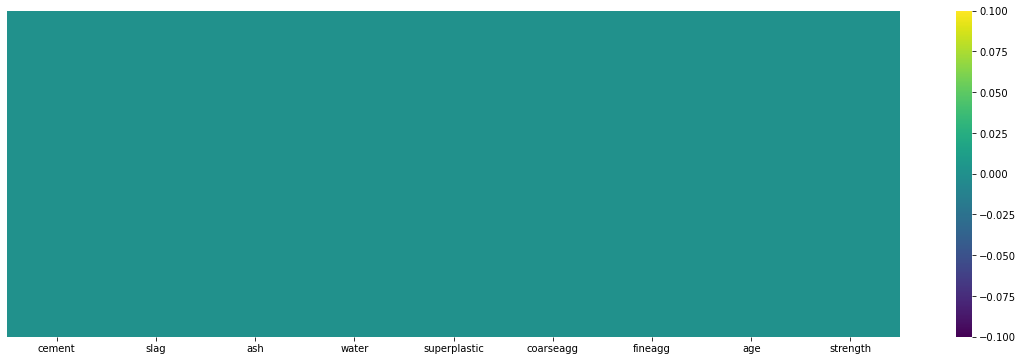

In [8]:
plt.figure(figsize = (20, 6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

#### From the above plot, we can infer that there are no null or missing values in the data.

## Exploratory Data Analysis

Our predictor column is 'strength'. We have to analyse the strength of the concrete mixture considering various independent features. 

Here all the columns are continuous in nature. 

### 1. Univariate analysis

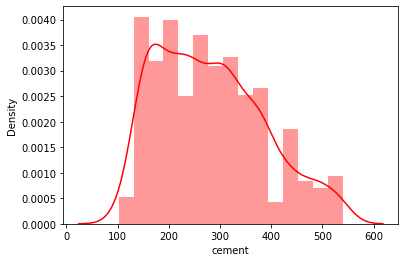

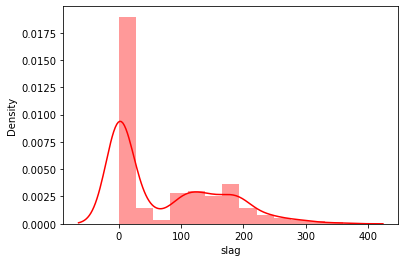

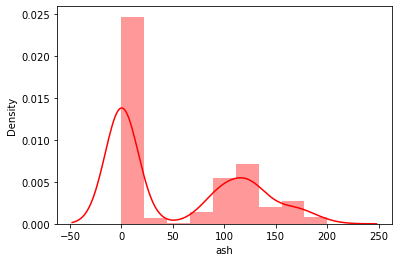

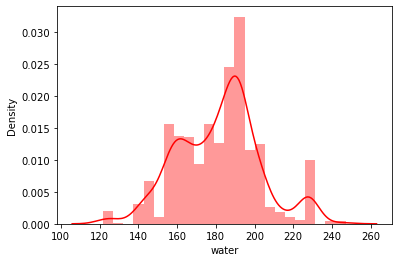

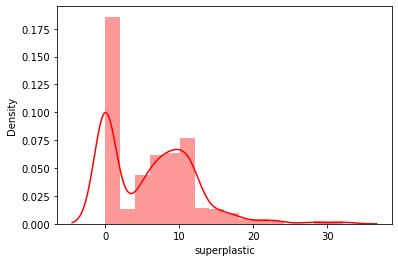

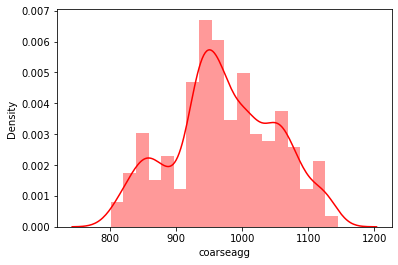

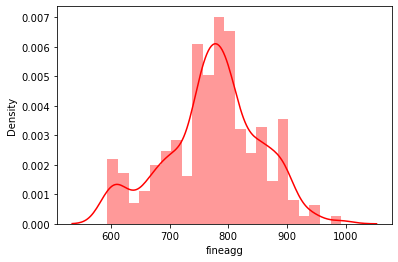

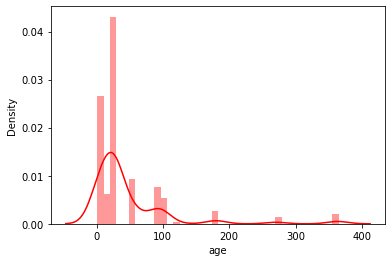

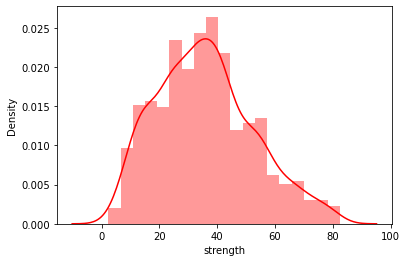

In [9]:
for i in df.columns:
    sns.distplot(df[i], color = 'r')
    plt.show()

From the above distribution plots, we can notice that the data is not distributed properly. 

So have to check the **Skewness** and **Kurtosis** of the data.

In [10]:
from scipy.stats import skew, kurtosis

#### Skewness 
The standard range of skewness should be between -1 to +1.

In [11]:
# print('The skewness of cement is :', skew(df['cement']))
# print('The skewness of slag is :', skew(df['slag']))
# print('The skewness of ash is :', skew(df['ash']))
# print('The skewness of water is :', skew(df['water']))
# print('The skewness of superplastic is :', skew(df['superplastic']))
# print('The skewness of coarseagg is :', skew(df['coarseagg']))
# print('The skewness of fineagg is :', skew(df['fineagg']))
# print('The skewness of age is :', skew(df['age']))

In [12]:
for i in df.columns:
    print(f'The skewness of {i} is :', skew(df[i]))

The skewness of cement is : 0.5087389156389815
The skewness of slag is : 0.7995503309986298
The skewness of ash is : 0.5365710347923704
The skewness of water is : 0.07451965817729818
The skewness of superplastic is : 0.9058808712519942
The skewness of coarseagg is : -0.04016114865669757
The skewness of fineagg is : -0.2526409879628909
The skewness of age is : 3.264414535416805
The skewness of strength is : 0.4163697941146936


#### Kurtosis
The standard range of kurtosis should be between -3 to +3.

In [13]:
for i in df.columns:
    print(f'The kurtosis of {i} is :', kurtosis(df[i]))

The kurtosis of cement is : -0.5239478718269015
The kurtosis of slag is : -0.5115315509621308
The kurtosis of ash is : -1.3281245631223983
The kurtosis of water is : 0.11567025723667079
The kurtosis of superplastic is : 1.3986078578460077
The kurtosis of coarseagg is : -0.6019318003595231
The kurtosis of fineagg is : -0.10750125086155382
The kurtosis of age is : 12.104176861479678
The kurtosis of strength is : -0.31802358543657805


'**age**' is the only feature which is having both skewness and kurtosis out of the normal range.

In [14]:
# df['age'] = np.sqrt(df['age'])
# df['age'].skew()

Logarithmic Transformation method is used to skew the data in the **age** feature.

In [15]:
df['age'] = np.log(df['age'])
df['age'].skew()

-0.15135107046754767

In [16]:
df['age'].kurtosis()

-0.3537765605288645

<AxesSubplot:xlabel='age', ylabel='Density'>

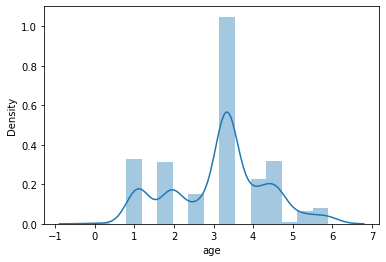

In [17]:
sns.distplot(df.age)

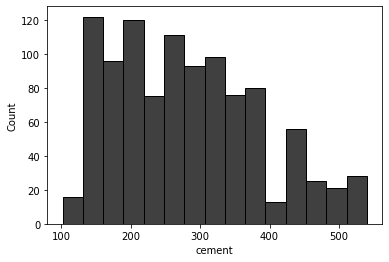

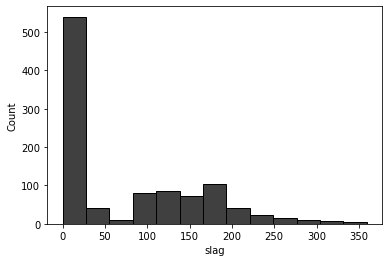

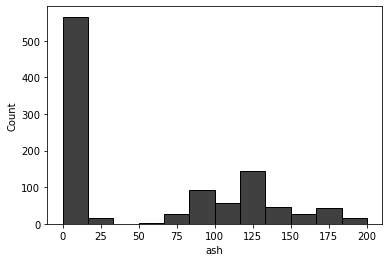

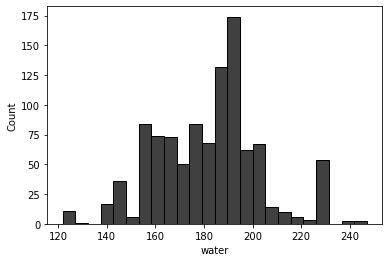

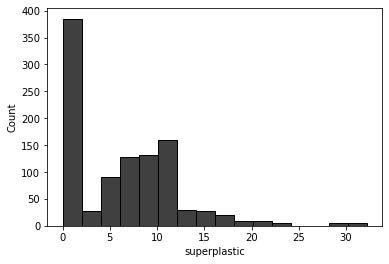

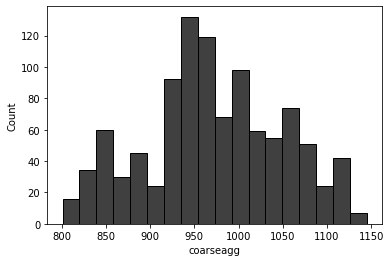

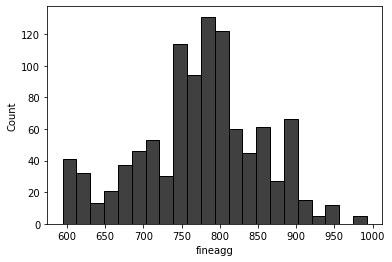

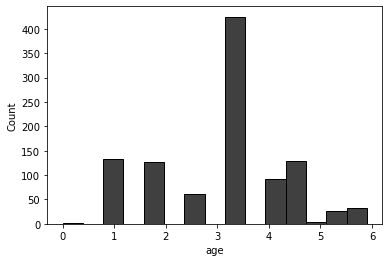

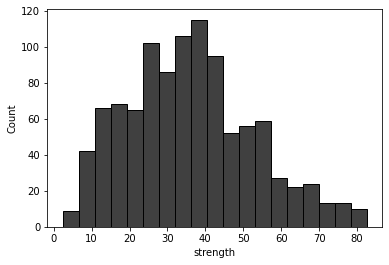

In [18]:
for i in df.columns:
    sns.histplot(df[i], color = 'k')
    plt.show()

#### Outliers Treatment

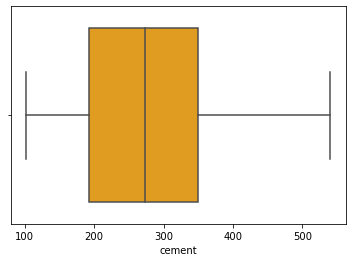

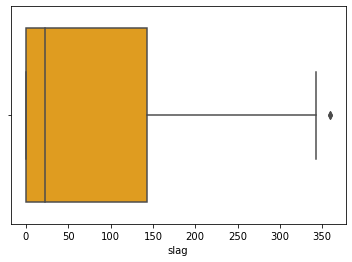

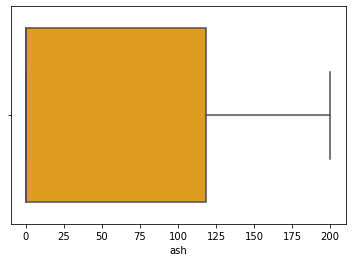

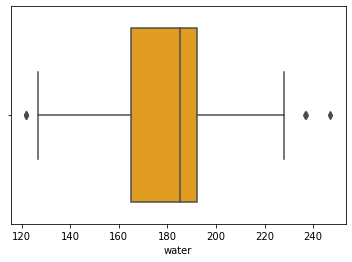

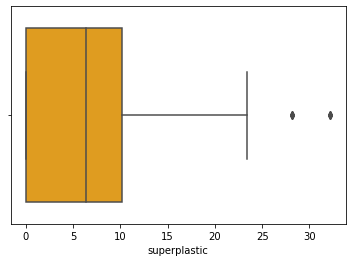

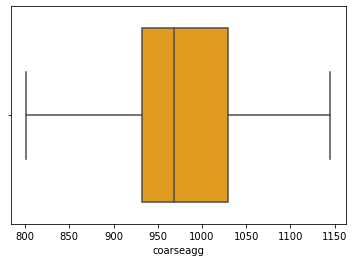

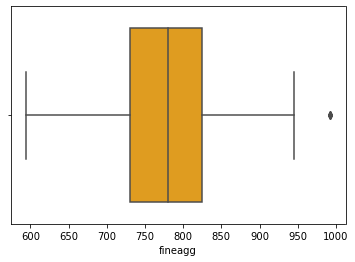

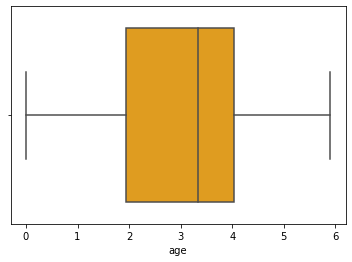

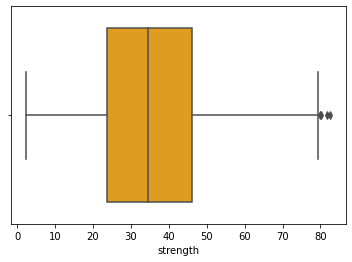

In [19]:
for i in df.columns:
    sns.boxplot(df[i], color = 'orange')
    plt.show()

In [20]:
# Checking the proportion of outliers in all the independent features

print('The proportion of outliers in each feature is as follows')
print('*****************************************************************************************')

for col in df:
    print('Q1 ---> ' + col, df[col].quantile(0.25))
    print('Q3 ---> ' + col, df[col].quantile(0.75))
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    print('IQR of ' + col, IQR)
    lower_limit = q1 - (1.5 * IQR)
    upper_limit = q3 + (1.5 * IQR)
    print('Lower limit of ---> ' + col, lower_limit)
    print('Upper Limit of ---> ' + col, upper_limit)
    upper_outlier = len(df[col][df[col] > upper_limit])
    lower_outlier = len(df[col][df[col] < lower_limit])
    print('Outlier of the upper limit is', upper_outlier)
    print('Outlier of the lower limit is', lower_outlier)
    overall_outliers = upper_outlier + lower_outlier
    print('The number of outliers in ---> ' + col, overall_outliers)
    print(col, 'contains', np.round((overall_outliers/len(df[col])*100), 2), '% of outliers in it')
    print('*****************************************************************************************')
    print()

The proportion of outliers in each feature is as follows
*****************************************************************************************
Q1 ---> cement 192.375
Q3 ---> cement 350.0
IQR of cement 157.625
Lower limit of ---> cement -44.0625
Upper Limit of ---> cement 586.4375
Outlier of the upper limit is 0
Outlier of the lower limit is 0
The number of outliers in ---> cement 0
cement contains 0.0 % of outliers in it
*****************************************************************************************

Q1 ---> slag 0.0
Q3 ---> slag 142.95
IQR of slag 142.95
Lower limit of ---> slag -214.42499999999998
Upper Limit of ---> slag 357.375
Outlier of the upper limit is 2
Outlier of the lower limit is 0
The number of outliers in ---> slag 2
slag contains 0.19 % of outliers in it
*****************************************************************************************

Q1 ---> ash 0.0
Q3 ---> ash 118.3
IQR of ash 118.3
Lower limit of ---> ash -177.45
Upper Limit of ---> ash 295.75


In [21]:
# Segregating the predictor variable

df1 = df.iloc[:, :8]
df1.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3.332205
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,2.639057
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,3.332205
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,3.332205
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,3.332205


In [22]:
df1.shape

(1030, 8)

#### Hypothesis Testing
We are checking the individual ***Correlation*** of the predictor with each independent feature.

In [23]:
from scipy.stats import pearsonr

In [24]:
for i in df1.columns:
    a = df1[i].corr(df.strength)
    print(f'Correlation of {i} and strength is :', a)

Correlation of cement and strength is : 0.4978319193241572
Correlation of slag and strength is : 0.13482926149740473
Correlation of ash and strength is : -0.10575491629731354
Correlation of water and strength is : -0.2896333849853046
Correlation of superplastic and strength is : 0.366078827188519
Correlation of coarseagg and strength is : -0.16493461446010965
Correlation of fineagg and strength is : -0.16724124729005818
Correlation of age and strength is : 0.5521803859561097


#### Visualizing the predictor with all the independent features

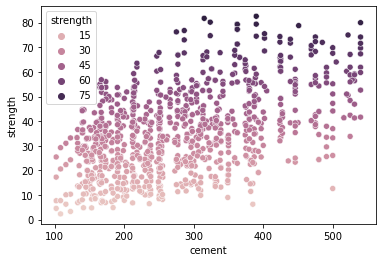

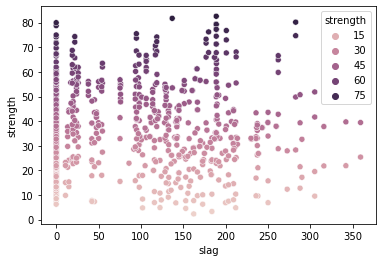

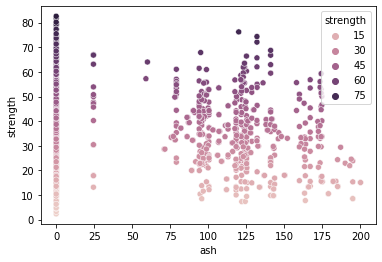

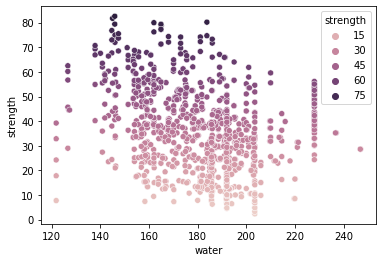

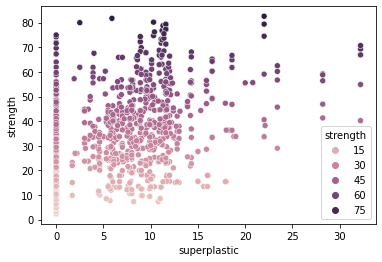

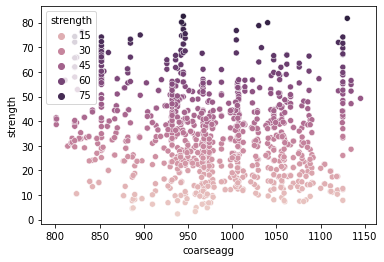

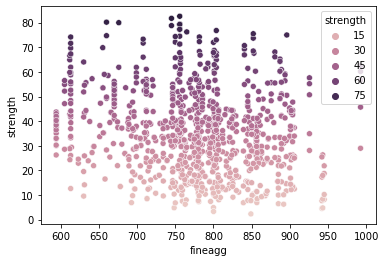

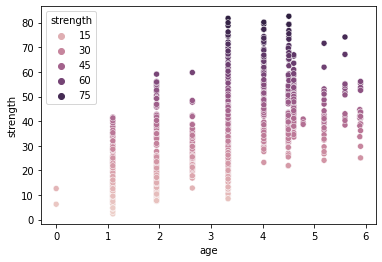

In [25]:
for i in df1.columns:
    sns.scatterplot(x = df1[i], y = df.strength, hue = df.strength)
    plt.show()
#dark means more strength

### 2. Multivariate analysis

In [26]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,-0.001688,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.017805,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.014294,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.165943,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.042885,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.040159,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.113917,-0.167241
age,-0.001688,-0.017805,-0.014294,0.165943,-0.042885,-0.040159,-0.113917,1.000000,0.552180
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.552180,1.000000


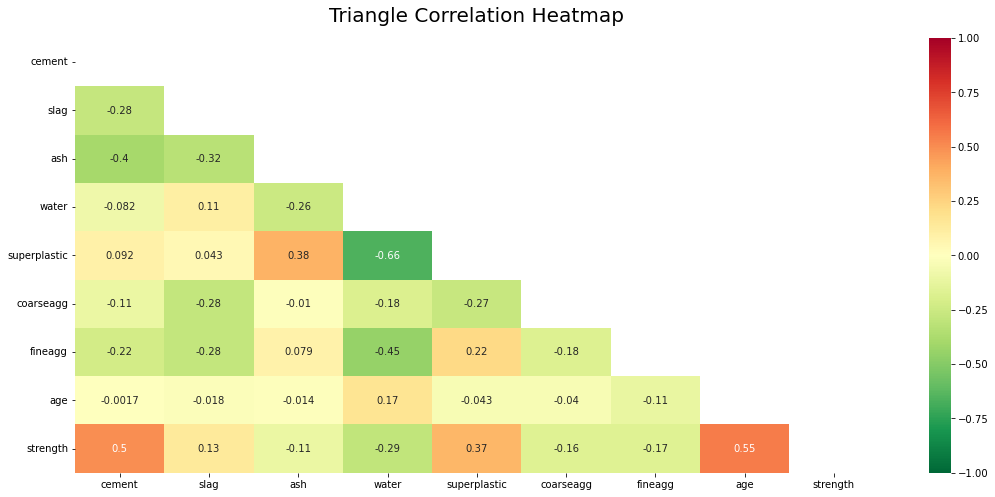

In [27]:
plt.figure(figsize=(18, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='RdYlGn_r')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':20}, pad=16);

From the above heatmap we can notice that none of the independent features are correlated with the other independent feature or the predictor as well.

In [28]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   float64
 8   strength      1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.iloc[:, :8]
y = df['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

### Feature Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
m = MinMaxScaler()
X_train = m.fit_transform(X_train)
X_test = m.fit_transform(X_test)
#no need to treat outliers in minmax

## Model building considering outliers

#### 1. Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lm = LinearRegression()
lm.fit(X_train, y_train)
predict = lm.predict(X_test)
r2_score(y_test, predict)

0.6284458084842081

In [34]:
mse = mean_squared_error(y_test, predict)
mse

106.31594286350972

#### 2. Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf_fit = rf.fit(X_train, y_train)
predict = rf.predict(X_test)
r2_score(y_test, predict)

0.7013392101226694

In [36]:
mse = mean_squared_error(y_test, predict)
mse

85.45833743021956

Hyperparameter Tuning for Random Forest Regressor

In [37]:
rf = RandomForestRegressor(random_state = 27, n_estimators = 200)
rf_fit = rf.fit(X_train, y_train)
predict = rf.predict(X_test)
r2_score(y_test, predict)

0.7137593817898069

In [38]:
mse = mean_squared_error(y_test, predict)
mse

81.90444868001757

#### 3. XGBoost Regressor

In [39]:
!pip install XGBoost

In [40]:
import xgboost
from xgboost import XGBRegressor

In [41]:
xgb = XGBRegressor()
xgb_fit = xgb.fit(X_train, y_train)
predict = xgb.predict(X_test)
r2_score(y_test, predict)

0.7227121114781354

In [42]:
mse = mean_squared_error(y_test, predict)
mse

79.34272842560797

Hyperparameter Tuning for XGBoost Regressor

In [43]:
xgb = XGBRegressor(n_estimators = 300, random_state = 17)
xgb_fit = xgb.fit(X_train, y_train)
predict = xgb.predict(X_test)
r2_score(y_test, predict)

0.7255196924906766

We can notice that there is no change taking place even after tuning the hyperparameters.

## Conclusion

From the above models, we can notice that **XGBoost** is performing better compared to other regression models with considering outliers.

## Model building by eliminating outliers

In [44]:
for i in df.columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    upper_limit = q3 + (1.5 * IQR)
    limit = df[i] > upper_limit
    df.drop(index = df[limit].index, inplace = True)
    
print(df.shape)

(999, 9)


In [45]:
X = df.iloc[:, :8]
y = df['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [46]:
m = MinMaxScaler()
X_train = m.fit_transform(X_train)
X_test = m.fit_transform(X_test)

#### 1. Linear Regression

In [47]:
lm = LinearRegression()
lm.fit(X_train, y_train)
predict = lm.predict(X_test)
r2_score(y_test, predict)

0.7778826091449466

In [48]:
mse = mean_squared_error(y_test, predict)
mse

56.217818804777565

#### 2. Random Forest Regressor

In [49]:
rf = RandomForestRegressor()
rf_fit = rf.fit(X_train, y_train)
predict = rf.predict(X_test)
r2_score(y_test, predict)

0.7715438959609161

In [50]:
mse = mean_squared_error(y_test, predict)
mse

57.82214446277081

Hyperparameter Tuning for Random Forest Regressor

In [51]:
rf = RandomForestRegressor(random_state = 27, n_estimators = 200)
rf_fit = rf.fit(X_train, y_train)
predict = rf.predict(X_test)
r2_score(y_test, predict)

0.7734614559605475

In [52]:
mse = mean_squared_error(y_test, predict)
mse

57.33681082819325

#### 3. XGBoost Regressor

In [53]:
xgb = XGBRegressor()
xgb_fit = xgb.fit(X_train, y_train)
predict = xgb.predict(X_test)
r2_score(y_test, predict)

0.7767422300871751

In [54]:
mse = mean_squared_error(y_test, predict)
mse

56.5064482677465

Hyperparameter Tuning for XGBoost Regressor

In [55]:
xgb = XGBRegressor(n_estimators = 300, random_state = 17)
xgb_fit = xgb.fit(X_train, y_train)
predict = xgb.predict(X_test)
r2_score(y_test, predict)

0.7766795652348445

In [56]:
mse = mean_squared_error(y_test, predict)
mse

56.522308715684375

## Conclusion

From the above models, we can notice that **Linear model** is performing better after treating outliers compared to other regression models, as it is sensitive to outliers.